In [1]:
#notation in the data set


#bp-blood pressure
#sg-specific gravity of urine
#al-Albumin quantity in urine
#su-sugar level
#rbc-red blood cells
#pc-pus cell
#pcc-pus cell clumps
#ba-bacteria
#bgr-blood glucose random
#bu-blood urea
#sc-serum creatinine
#sod-Sodium
#pot-potassium
#hemo-Haemoglobin
#pcv-Packed cell volume
#wc-white blood cell count
#rc-red blood cell count
#htn-hypertension
#dm-Diabetes Mellitus
#cad-coronary Artery disease
#appet-appetite
#pe-pedal edema
#ane-Anemia
#classification-CKD,Not_CKD

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import time

In [2]:
data = pd.read_csv(r"C:\Users\pc\kidneydiseaseprediction\kidney_disease.csv")
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
# Information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
# Description of the dataset
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
# To see what are the column names in our dataset
print(data.columns)

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [7]:
# Mapping the text to 1/0 and cleaning the dataset 
data[['htn','dm','cad','pe','ane']] = data[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
data[['rbc','pc']] = data[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
data[['pcc','ba']] = data[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
data[['appet']] = data[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
data['classification'] = data['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
data.rename(columns={'classification':'class'},inplace=True)

data['pe'] = data['pe'].replace(to_replace='good',value=0) 
data['appet'] = data['appet'].replace(to_replace='no',value=0)
data['cad'] = data['cad'].replace(to_replace='\tno',value=0)
data['dm'] = data['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
data.drop('id',axis=1,inplace=True)

In [8]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [9]:
# This helps us to count how many NaN are there in each column
len(data)-data.count()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       70
wc       105
rc       130
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [10]:
# This shows number of rows with missing data
data.isnull().sum(axis = 1)

0      3
1      5
2      3
3      0
4      2
      ..
395    0
396    0
397    0
398    0
399    0
Length: 400, dtype: int64

<AxesSubplot:>

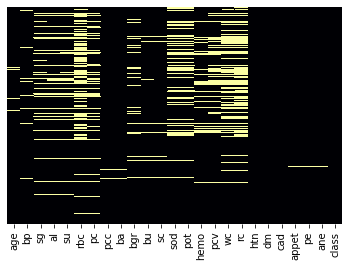

In [11]:
#This is a visualization of missing data in the dataset
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='inferno')

In [12]:
# This shows number of complete cases and also removes all the rows with NaN
data2 = data.dropna()
print(data2.shape)

(158, 25)


<AxesSubplot:>

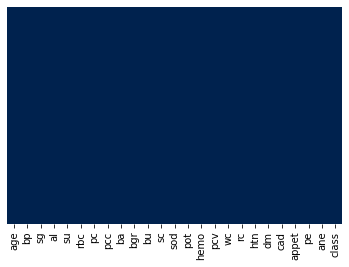

In [13]:
# Now our dataset is clean
sns.heatmap(data2.isnull(),yticklabels=False,cbar=False,cmap='cividis')

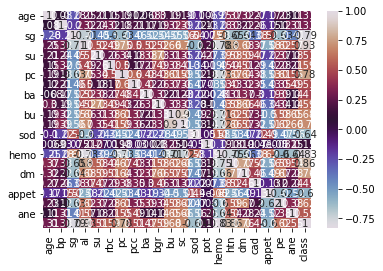

In [14]:
sns.heatmap(data2.corr(),cmap="twilight",annot=True)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


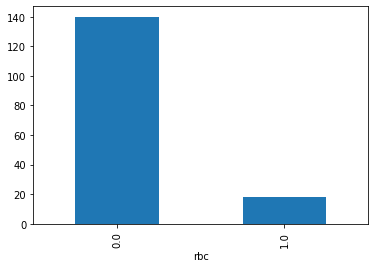

In [15]:
# Counting number of normal vs. abnormal red blood cells of people having chronic kidney disease
print(data2.groupby('rbc').rbc.count().plot(kind="bar"))

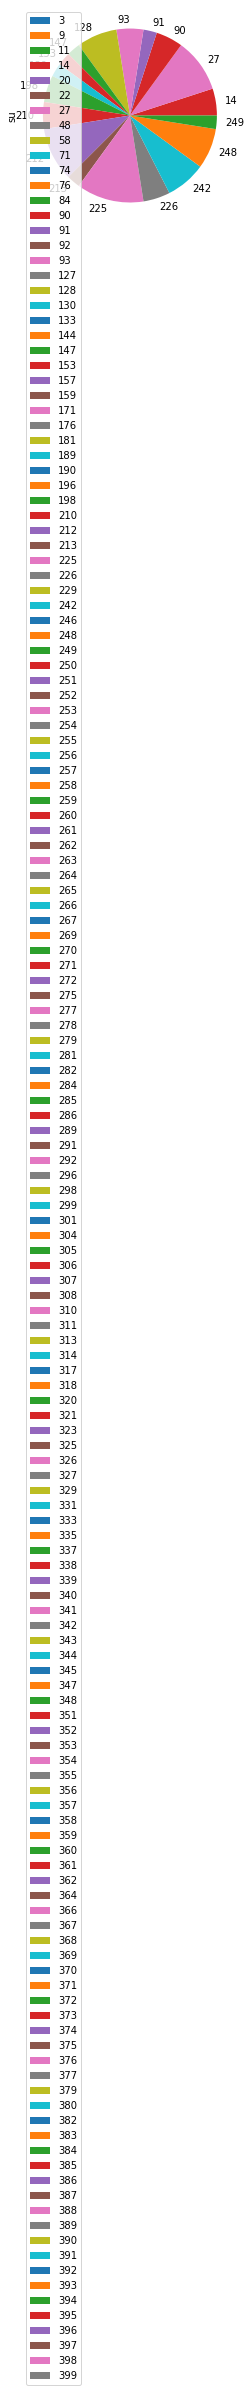

In [94]:
#This plot shows the patient's sugar level compared to their ages
data2.plot(kind='pie', x='age',y='su');
plt.show()

In [17]:
# Shows the maximum blood pressure having chronic kidney disease
print(data2.groupby('class').bp.max())

class
0.0     80.0
1.0    110.0
Name: bp, dtype: float64


In [18]:
print(data2['dm'].value_counts(dropna=False))

0.0    130
1.0     28
Name: dm, dtype: int64


In [19]:
#training the data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data2.iloc[:,:-1], data2['class'], 
                                                    test_size=0.33, random_state=44, stratify= data2['class'])

In [21]:
X_train.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
317,58.0,70.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,102.0,...,15.0,40,8100,4.9,0.0,0.0,0.0,1.0,0.0,0.0
296,41.0,70.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,125.0,...,16.8,41,6300,5.9,0.0,0.0,0.0,1.0,0.0,0.0
157,62.0,70.0,1.025,3.0,0.0,0.0,1.0,0.0,0.0,122.0,...,12.6,39,7900,3.9,1.0,1.0,0.0,1.0,0.0,0.0
258,42.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,98.0,...,13.9,44,8400,5.5,0.0,0.0,0.0,1.0,0.0,0.0
291,47.0,80.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,124.0,...,14.9,41,7000,5.7,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
X_test.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
370,69.0,70.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,83.0,...,16.2,50,9300,5.4,0.0,0.0,0.0,1.0,0.0,0.0
355,23.0,60.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,95.0,...,15.0,52,6300,4.6,0.0,0.0,0.0,1.0,0.0,0.0
133,70.0,100.0,1.015,4.0,0.0,0.0,0.0,0.0,0.0,118.0,...,12.0,37,\t8400,8.0,1.0,0.0,0.0,1.0,0.0,0.0
147,60.0,60.0,1.010,3.0,1.0,0.0,1.0,1.0,0.0,288.0,...,7.9,25,15200,3.0,1.0,0.0,0.0,0.0,0.0,1.0
48,73.0,70.0,1.005,0.0,0.0,0.0,0.0,0.0,0.0,70.0,...,10.0,29,18900,3.5,1.0,1.0,0.0,1.0,1.0,0.0


In [23]:
y_train.head(5)

317    0.0
296    0.0
157    1.0
258    0.0
291    0.0
Name: class, dtype: float64

In [24]:
y_test.head(5)

370    0.0
355    0.0
133    1.0
147    1.0
48     1.0
Name: class, dtype: float64

In [25]:
print(X_train.shape)

(105, 24)


# KNN 

In [26]:
knn = KNeighborsClassifier(n_neighbors=44)

In [27]:
s1=time.time()
KnnModel=KNeighborsClassifier().fit(X_train,y_train)
s2=time.time()
Knn_tt=s2-s1
print(f"Time taken by Knn for training is {Knn_tt}")

Time taken by Knn for training is 0.015606880187988281


In [28]:
Ya=y_test  #Xtest
s1=time.time()
Yp=KnnModel.predict(X_test)
s2=time.time()
Knn_ts=s2-s1
print(f"Time taken by Knn for testing is {Knn_ts}")

Time taken by Knn for testing is 0.23834609985351562


In [29]:
cm_knn=confusion_matrix(Ya,Yp)
print(cm_knn)

[[39  0]
 [ 9  5]]


In [30]:
print(classification_report(Ya,Yp))

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90        39
         1.0       1.00      0.36      0.53        14

    accuracy                           0.83        53
   macro avg       0.91      0.68      0.71        53
weighted avg       0.86      0.83      0.80        53



In [31]:
acc_knn=accuracy_score(Ya,Yp)*100
print(f"Accuracy of Knn {acc_knn}")

Accuracy of Knn 83.01886792452831


# Logistic Regression

In [32]:
s1=time.time()
LRModel=LogisticRegression().fit(X_train,y_train)
s2=time.time()
lr_tt=s2-s1
print(f"Time taken by LR for training is {lr_tt}")

Time taken by LR for training is 0.2755885124206543


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
Ya=y_test  #Xtest
s1=time.time()
Yp=LRModel.predict(X_test)
s2=time.time()
lr_ts=s2-s1
print(f"Time taken by Knn for testing is {lr_ts}")

Time taken by Knn for testing is 0.005004405975341797


In [34]:
cm_lr=confusion_matrix(Ya,Yp)
print(cm_lr)

[[39  0]
 [ 0 14]]


In [35]:
print(classification_report(Ya,Yp))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        39
         1.0       1.00      1.00      1.00        14

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



In [36]:
acc_lr=accuracy_score(Ya,Yp)*100
print(f"Accuracy of logistic regression {acc_lr}")

Accuracy of logistic regression 100.0


# Desision Tree Classifier

In [37]:
s1=time.time()
DTModel=DecisionTreeClassifier().fit(X_train,y_train)
s2=time.time()
DT_tt=s2-s1
print(f"Time taken by DT for training is {DT_tt}")

Time taken by DT for training is 0.18400073051452637


In [38]:
Ya=y_test  #Xtest
s1=time.time()
Yp=DTModel.predict(X_test)
s2=time.time()
dt_ts=s2-s1
print(f"Time taken by DT for testing is {dt_ts}")

Time taken by DT for testing is 0.00600743293762207


In [39]:
cm_DTC=confusion_matrix(Ya,Yp)
print(cm_DTC)

[[39  0]
 [ 1 13]]


In [40]:
print(classification_report(Ya,Yp))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        39
         1.0       1.00      0.93      0.96        14

    accuracy                           0.98        53
   macro avg       0.99      0.96      0.98        53
weighted avg       0.98      0.98      0.98        53



In [41]:
acc_dtc=accuracy_score(Ya,Yp)*100
print(f"Accuracy of decision tree classifier {acc_dtc}")

Accuracy of decision tree classifier 98.11320754716981


In [42]:
tt_time=[Knn_tt,lr_tt,DT_tt]
ts_time=[Knn_ts,lr_ts,dt_ts]
acc_model=[acc_knn,acc_lr,acc_dtc]
model_name=["KNN","LR","DT"]

In [43]:
table=pd.DataFrame({"TrainingTime":tt_time,"TestingTime":ts_time,"Acc":acc_model},index=model_name)

In [44]:
table

,TrainingTime,TestingTime,Acc
KNN,0.015607,0.238346,83.018868
LR,0.275589,0.005004,100.000000
DT,0.184001,0.006007,98.113208


In [45]:
feature_importances = pd.DataFrame(DecisionTreeClassifier().fit(X_train,y_train).feature_importances_, index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

       importance
al            1.0
age           0.0
pot           0.0
pe            0.0
appet         0.0
cad           0.0
dm            0.0
htn           0.0
rc            0.0
wc            0.0
pcv           0.0
hemo          0.0
sod           0.0
bp            0.0
sc            0.0
bu            0.0
bgr           0.0
ba            0.0
pcc           0.0
pc            0.0
rbc           0.0
su            0.0
sg            0.0
ane           0.0


# filtering the data

In [46]:
data3 = data.drop(columns=['rbc', 'pc', 'sod', 'pot', 'pcv', 'wc', 'rc'])
data3. shape

(400, 18)

In [47]:
data3.head()

,age,bp,sg,al,su,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,121.0,36.0,1.2,15.4,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,NaN,18.0,0.8,11.3,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,423.0,53.0,1.8,9.6,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,117.0,56.0,3.8,11.2,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,106.0,26.0,1.4,11.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [48]:
data3.isnull().sum()

age       9
bp       12
sg       47
al       46
su       49
pcc       4
ba        4
bgr      44
bu       19
sc       17
hemo     52
htn       2
dm        2
cad       2
appet     1
pe        1
ane       1
class     0
dtype: int64

In [49]:
data3.mode()

,age,bp,sg,al,su,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane,class
0,60.0,80.0,1.02,0.0,0.0,0.0,0.0,99.0,46.0,1.2,15.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [50]:
# Fill in the NaNs with the mode for each column.   
data3_imp = data3.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [51]:
data3_imp.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
hemo     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

# retraining the normalized data

In [52]:
X_train, X_test, y_train, y_test = train_test_split(data3_imp.iloc[:,:-1], data3_imp['class'],
                                                    test_size = 0.33, random_state=44,
                                                   stratify = data3_imp['class'])

In [53]:
X_train

,age,bp,sg,al,su,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane
302,29.0,70.0,1.020,0.0,0.0,0.0,0.0,127.0,44.0,1.2,14.8,0.0,0.0,0.0,1.0,0.0,0.0
93,73.0,100.0,1.010,3.0,2.0,1.0,0.0,295.0,90.0,5.6,9.2,1.0,1.0,1.0,0.0,0.0,0.0
156,66.0,90.0,1.015,2.0,0.0,0.0,1.0,153.0,76.0,3.3,15.0,0.0,0.0,0.0,0.0,0.0,0.0
362,33.0,80.0,1.025,0.0,0.0,0.0,0.0,89.0,19.0,1.1,15.0,0.0,0.0,0.0,1.0,0.0,0.0
206,60.0,70.0,1.010,1.0,0.0,0.0,0.0,109.0,96.0,3.9,13.8,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,60.0,80.0,1.010,1.0,1.0,0.0,0.0,172.0,32.0,2.7,11.2,0.0,1.0,1.0,0.0,0.0,0.0
371,28.0,60.0,1.025,0.0,0.0,0.0,0.0,79.0,50.0,0.5,17.6,0.0,0.0,0.0,1.0,0.0,0.0
130,50.0,90.0,1.010,2.0,0.0,1.0,1.0,128.0,208.0,9.2,8.2,0.0,0.0,0.0,0.0,1.0,1.0
124,65.0,100.0,1.015,0.0,0.0,0.0,0.0,90.0,98.0,2.5,9.1,1.0,0.0,0.0,1.0,0.0,0.0


In [54]:
X_test

,age,bp,sg,al,su,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane
165,60.0,80.0,1.020,0.0,2.0,0.0,0.0,99.0,46.0,1.2,15.0,0.0,1.0,0.0,1.0,0.0,0.0
63,46.0,70.0,1.015,1.0,0.0,0.0,0.0,150.0,111.0,6.1,7.5,0.0,0.0,0.0,1.0,0.0,1.0
306,52.0,80.0,1.020,0.0,0.0,0.0,0.0,128.0,30.0,1.2,15.2,0.0,0.0,0.0,1.0,0.0,0.0
55,35.0,80.0,1.005,3.0,0.0,0.0,0.0,99.0,46.0,1.2,9.5,0.0,0.0,0.0,1.0,1.0,0.0
22,48.0,80.0,1.025,4.0,0.0,0.0,0.0,95.0,163.0,7.7,9.8,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,60.0,80.0,1.025,0.0,0.0,0.0,0.0,81.0,15.0,0.5,15.0,0.0,0.0,0.0,1.0,0.0,0.0
359,74.0,60.0,1.020,0.0,0.0,0.0,0.0,88.0,50.0,0.6,17.2,0.0,0.0,0.0,1.0,0.0,0.0
73,60.0,100.0,1.015,2.0,0.0,0.0,0.0,129.0,107.0,6.7,4.8,1.0,0.0,0.0,1.0,1.0,1.0
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,140.0,49.0,0.5,15.7,0.0,0.0,0.0,1.0,0.0,0.0


In [55]:
y_train

302    0.0
93     1.0
156    1.0
362    0.0
206    1.0
      ... 
96     1.0
371    0.0
130    1.0
124    1.0
354    0.0
Name: class, Length: 268, dtype: float64

In [56]:
y_test

165    1.0
63     1.0
306    0.0
55     1.0
22     1.0
      ... 
366    0.0
359    0.0
73     1.0
395    0.0
260    0.0
Name: class, Length: 132, dtype: float64

In [57]:
y_train.value_counts()

1.0    168
0.0    100
Name: class, dtype: int64

# KNN reapply

In [58]:
knn = KNeighborsClassifier(n_neighbors=45)

In [59]:
s1=time.time()
KnnModel=KNeighborsClassifier().fit(X_train,y_train)
s2=time.time()
Knn_tt=s2-s1
print(f"Time taken by Knn for training is {Knn_tt}")

Time taken by Knn for training is 0.0


In [60]:
s1=time.time()
KnnModel=KNeighborsClassifier().fit(X_train,y_train)
s2=time.time()
Knn_tt=s2-s1
print(f"Time taken by Knn for training is {Knn_tt}")

Time taken by Knn for training is 0.008074760437011719


In [61]:
Ya=y_test  #Xtest
s1=time.time()
Yp=KnnModel.predict(X_test)
s2=time.time()
Knn_ts=s2-s1
print(f"Time taken by Knn for testing is {Knn_ts}")

Time taken by Knn for testing is 0.18088269233703613


In [62]:
cm_knn=confusion_matrix(Ya,Yp)
print(cm_knn)

[[41  9]
 [24 58]]


In [63]:
print(classification_report(Ya,Yp))

              precision    recall  f1-score   support

         0.0       0.63      0.82      0.71        50
         1.0       0.87      0.71      0.78        82

    accuracy                           0.75       132
   macro avg       0.75      0.76      0.75       132
weighted avg       0.78      0.75      0.75       132



In [64]:
acc_knn=accuracy_score(Ya,Yp)*100
print(f"Accuracy of Knn {acc_knn}")

Accuracy of Knn 75.0


# Logistic Regression reapply

In [65]:
s1=time.time()
LRModel=LogisticRegression().fit(X_train,y_train)
s2=time.time()
lr_tt=s2-s1
print(f"Time taken by LR for training is {lr_tt}")

Time taken by LR for training is 0.09694170951843262


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
Ya=y_test  #Xtest
s1=time.time()
Yp=LRModel.predict(X_test)
s2=time.time()
lr_ts=s2-s1
print(f"Time taken by Knn for testing is {lr_ts}")

Time taken by Knn for testing is 0.0


In [67]:
cm_lr=confusion_matrix(Ya,Yp)
print(cm_lr)

[[49  1]
 [ 2 80]]


In [68]:
print(classification_report(Ya,Yp))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        50
         1.0       0.99      0.98      0.98        82

    accuracy                           0.98       132
   macro avg       0.97      0.98      0.98       132
weighted avg       0.98      0.98      0.98       132



In [69]:
acc_lr=accuracy_score(Ya,Yp)*100
print(f"Accuracy of logistic regression {acc_lr}")

Accuracy of logistic regression 97.72727272727273


# Decision Tree reapply

In [70]:
s1=time.time()
DTModel=DecisionTreeClassifier().fit(X_train,y_train)
s2=time.time()
DT_tt=s2-s1
print(f"Time taken by DT for training is {DT_tt}")

Time taken by DT for training is 0.015600919723510742


In [71]:
Ya=y_test  #Xtest
s1=time.time()
Yp=DTModel.predict(X_test)
s2=time.time()
dt_ts=s2-s1
print(f"Time taken by DT for testing is {dt_ts}")

Time taken by DT for testing is 0.015655994415283203


In [72]:
cm_DTC=confusion_matrix(Ya,Yp)
print(cm_DTC)

[[50  0]
 [ 1 81]]


In [73]:
print(classification_report(Ya,Yp))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        50
         1.0       1.00      0.99      0.99        82

    accuracy                           0.99       132
   macro avg       0.99      0.99      0.99       132
weighted avg       0.99      0.99      0.99       132



In [74]:
acc_dtc=accuracy_score(Ya,Yp)*100
print(f"Accuracy of decision tree classifier {acc_dtc}")

Accuracy of decision tree classifier 99.24242424242425


In [75]:
tt_time=[Knn_tt,lr_tt,DT_tt]
ts_time=[Knn_ts,lr_ts,dt_ts]
acc_model=[acc_knn,acc_lr,acc_dtc]
model_name=["KNN","LR","DT"]

In [76]:
table=pd.DataFrame({"TrainingTime":tt_time,"TestingTime":ts_time,"Acc":acc_model},index=model_name)

In [77]:
table

,TrainingTime,TestingTime,Acc
KNN,0.008075,0.180883,75.000000
LR,0.096942,0.000000,97.727273
DT,0.015601,0.015656,99.242424


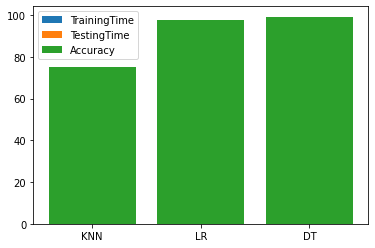

In [78]:
plt.bar(model_name,ts_time,label="TrainingTime")
plt.bar(model_name,tt_time,label="TestingTime")
plt.bar(model_name,acc_model,label="Accuracy")
plt.legend()
plt.show()

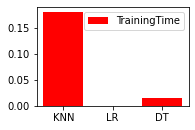

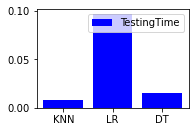

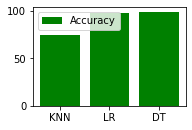

In [79]:
plt.subplot(2,2,1)
plt.bar(model_name,ts_time,label="TrainingTime",color=["red"])
plt.legend()
plt.show()
plt.subplot(2,2,2)
plt.bar(model_name,tt_time,label="TestingTime",color=["blue"])
plt.legend()
plt.show()
plt.subplot(2,2,3)
plt.bar(model_name,acc_model,label="Accuracy",color=["green"])
plt.legend()
plt.show()


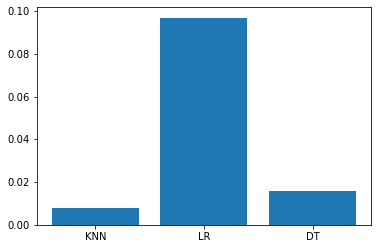

In [80]:
plt.bar(model_name,tt_time)
plt.show()

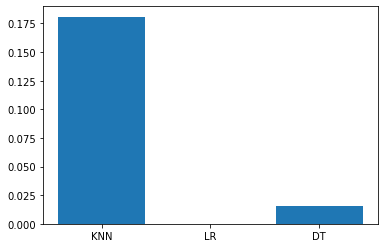

In [81]:
plt.bar(model_name,ts_time)
plt.show()

In [82]:
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydot
from sklearn import tree
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)/Graphviz2.38/bin/'

features = list(data3.columns[1:])
features

['bp',
 'sg',
 'al',
 'su',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'hemo',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'class']

In [83]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
Ypdt=dtree.predict(X_test)

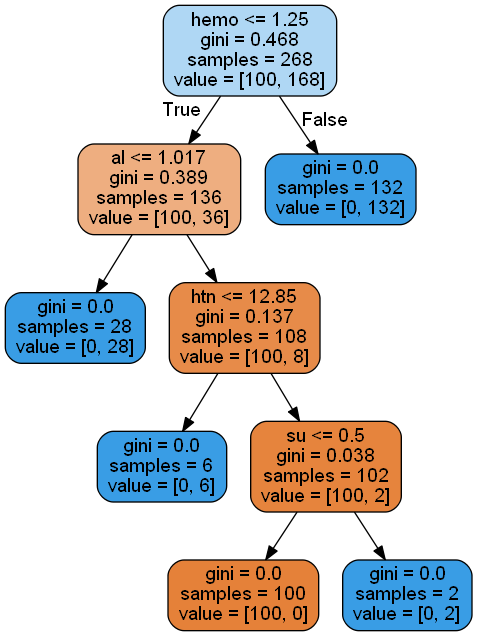

In [84]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data,feature_names = features,filled = True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [87]:
from xgboost import XGBClassifier
import pickle

In [91]:
pickle.dump(dtree,open('kidneydiseaseprediction.pkl','wb'))

In [92]:
pwd

'C:\\Users\\pc\\kidneydiseaseprediction'